<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#第4章『推定』" data-toc-modified-id="第4章『推定』-1">第4章『推定』</a></span><ul class="toc-item"><li><span><a href="#p.12" data-toc-modified-id="p.12-1.1">p.12</a></span></li><li><span><a href="#p.13" data-toc-modified-id="p.13-1.2">p.13</a></span></li><li><span><a href="#p.17" data-toc-modified-id="p.17-1.3">p.17</a></span></li></ul></li></ul></div>

# 第4章『推定』

## p.12

In [3]:
import scipy.stats
# https://stackoverflow.com/questions/24695174/python-equivalent-of-qnorm-qf-and-qchi2-of-r

scipy.stats.norm.ppf(0.975, 0, 1)

1.959963984540054

In [4]:
import scipy.stats
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

scipy.stats.t.ppf(0.90, 5)
### Jupyter Notebook上での実行
# 1.47588404882448 R
# 1.4758840487820273 Python
### R コンソール上での実行
# > qt(0.9, 5)
# [1] 1.475884
### Python コンソール上での実行
# >>> scipy.stats.t.ppf(0.90, 5)
# 1.4758840487820273

1.4758840487820273

## p.13

In [5]:
""" Pythonでは、平方根の計算には、 math または numpy ライブラリを用いる。複数の平方根を計算する場合は、numpyが良い。 """
import math
import scipy.stats

17.44-scipy.stats.norm.ppf(0.5+0.95/2, 0, 1)*3/math.sqrt(10)

15.580614903086317

In [7]:
import math
import scipy.stats

17.44+scipy.stats.norm.ppf(0.5+0.95/2, 0, 1)*3/math.sqrt(10)

19.299385096913685

## p.17

In [8]:
""" Pythonでは、データフレームを使うのは、pandasを用います。 """
import pandas as pd

time = [1, 2, 4, 5]
status = [1, 1, 0, 1]
data = pd.DataFrame({"time": time, "status": status})
data.head()

,time,status
0,1,1
1,2,1
2,4,0
3,5,1


In [9]:
""" pip3 install lifelines """
# https://lifelines.readthedocs.io/en/latest/Quickstart.html#installation
from lifelines.estimation import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [10]:
kmf.fit(data["time"], event_observed=data["status"])

<lifelines.KaplanMeierFitter: fitted with 4 observations, 1 censored>

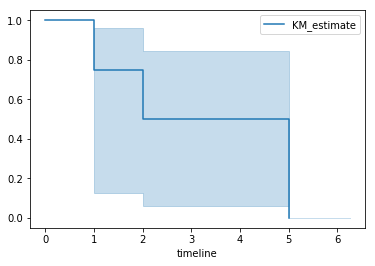

In [11]:
import matplotlib
%matplotlib inline
""" MacOSユーザーが「」というエラーが出た場合は、以下のサイトを参考にmatplotlibをデバッグする """
# https://qiita.com/Gen6/items/78d83d117ef67e0d53c2

kmf.survival_function_
kmf.median_
kmf.plot()

In [12]:
from lifelines.utils import survival_table_from_events

table = survival_table_from_events(data["time"], data["status"])
table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,4,4
1.0,1,1,0,0,4
2.0,1,1,0,0,3
4.0,1,0,1,0,2
5.0,1,1,0,0,1
